# Title: SmartRx-AI-Powered-Medicine-Recommendation-System

# Description:

SmartRx is an innovative web-based platform that combines cutting-edge machine learning technologies to improve healthcare outcomes.

This system offers two core functionalities:

Predictive Diagnostics:
Using machine learning models, the platform analyzes patient health data to predict the likelihood of chronic diseases .

Personalized Medical Recommendations: 
It also provides personalized health insights by analyzing user-input symptoms to predict potential conditions and recommend tailored health management strategies.
With a seamless, user-friendly interface, healthcare professionals can input patient data to receive real-time risk assessments and personalized recommendations. The platform also offers detailed visualizations of health trends, enabling users to gain valuable insights into their health risks and preventive actions.

# load dataset & tools

In [3]:
import  pandas as pd

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score
import pickle
# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../datasets/Training.csv')

In [ ]:
df

In [6]:
df.columns.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [7]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [8]:
df[df["prognosis"]=="Acne"].head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
370,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
371,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
372,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
373,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
374,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Acne


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


133 columns of symptom 

In [10]:
# vals = dataset.values.flatten()

In [11]:
df.shape

(4920, 133)

In [12]:
df["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

How many disease types are in the dataset?

In [13]:
df["prognosis"].unique().shape

(41,)

In [14]:
len(df['prognosis'].unique())   #How many uniques disease are in our training data

41

In [15]:
description = pd.read_csv('../datasets/description.csv')
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [16]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [17]:
description.iloc[4]

Disease                                            Drug Reaction
Description    Drug Reaction occurs when the body reacts adve...
Name: 4, dtype: object

In [18]:
medications = pd.read_csv('../datasets/medications.csv')
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [18]:
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [20]:
symtoms_df = pd.read_csv('../datasets/symtoms_df.csv')
symtoms_df.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [22]:
print(symtoms_df.info())
print(symtoms_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4920 non-null   int64 
 1   Disease     4920 non-null   object
 2   Symptom_1   4920 non-null   object
 3   Symptom_2   4920 non-null   object
 4   Symptom_3   4920 non-null   object
 5   Symptom_4   4572 non-null   object
dtypes: int64(1), object(5)
memory usage: 230.8+ KB
None
Unnamed: 0      0
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
dtype: int64


In [23]:
symtoms_df.columns

Index(['Unnamed: 0', 'Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Symptom_4'],
      dtype='object')

In [24]:
symtoms_df["Unnamed: 0"]

0          0
1          1
2          2
3          3
4          4
        ... 
4915    4915
4916    4916
4917    4917
4918    4918
4919    4919
Name: Unnamed: 0, Length: 4920, dtype: int64

In [25]:
symtoms_df["Symptom_2"]

0                   skin_rash
1        nodal_skin_eruptions
2        nodal_skin_eruptions
3                   skin_rash
4                   skin_rash
                ...          
4915                 headache
4916       pus_filled_pimples
4917       bladder_discomfort
4918               joint_pain
4919               high_fever
Name: Symptom_2, Length: 4920, dtype: object

In [26]:
symtoms_df.drop('Unnamed: 0',axis=1,inplace=True)
symtoms_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [27]:
symtoms_df.iloc[100]

Disease         Hypertension 
Symptom_1            headache
Symptom_2          chest_pain
Symptom_3           dizziness
Symptom_4     loss_of_balance
Name: 100, dtype: object

In [28]:
symptom_severity = pd.read_csv('../datasets/Symptom-severity.csv')
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [29]:
symptom_severity["weight"].unique()

array([1, 3, 4, 5, 6, 2, 7], dtype=int64)

In [28]:
precautions_df = pd.read_csv('../datasets/precautions_df.csv')


In [29]:
precautions_df.head()
precautions_df.drop('Unnamed: 0',axis=1,inplace=True)


In [30]:
precautions_df.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [31]:
precautions_df.shape

(41, 5)

In [32]:
precautions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [33]:
diets = pd.read_csv('../datasets/diets.csv')
diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [34]:
diets.shape

(41, 2)

In [35]:
diets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  41 non-null     object
 1   Diet     41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [36]:
workout_df = pd.read_csv('../datasets/workout_df.csv',usecols=[2,3])
workout_df.head()

,disease,workout
0,Fungal infection,Avoid sugary foods
1,Fungal infection,Consume probiotics
2,Fungal infection,Increase intake of garlic
3,Fungal infection,Include yogurt in diet
4,Fungal infection,Limit processed foods


In [37]:
workout_df.shape

(410, 2)

In [38]:
workout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disease  410 non-null    object
 1   workout  410 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


In [30]:
names = df.prognosis.unique()
names
len(df.prognosis.unique())
print(names)

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [37]:
value_counts = df.prognosis.value_counts()
value_counts 

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

# PROCESSING

In [38]:
### Transform Object Columns into Numbers
#becuase ML 
label = LabelEncoder()
df.prognosis = label.fit_transform(df.prognosis)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [40]:
df["prognosis"].iloc[18]

4

# train test split

In [41]:
### Split 
X = df.drop('prognosis',axis=1)
y = df['prognosis']


In [42]:
keys = X.columns
print(keys)
print(keys.shape)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)
(132,)


In [43]:
X.shape

(4920, 132)

In [44]:
y.tail()

4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, dtype: int32

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (3444, 132)
X_test shape is  (1476, 132)
y_train shape is  (3444,)
y_test shape is  (1476,)


In [49]:
len(df)

4920

In [51]:
!pip install lightgbm


# Training top models

In [52]:
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 1.0000
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9988
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9988
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9980
Cross-validating KNN...
Mean accuracy for KNN: 1.0000
Cross-validating SVC...
Mean accuracy for SVC: 1.0000
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 1.0000


In [54]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df

,Model,Mean Accuracy
0,RandomForest,1.000000
1,XGBoost,0.998838
2,LGBM,0.998838
3,DecisionTree,0.997967
4,KNN,1.000000
5,SVC,1.000000
6,LogisticRegression,1.000000


In [55]:
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,1.000000
4,KNN,1.000000
5,SVC,1.000000
6,LogisticRegression,1.000000
1,XGBoost,0.998838
2,LGBM,0.998838
3,DecisionTree,0.997967


In [69]:

# Initialize an empty dictionary to store confusion matrices
confusion_matrices = {}

# Iterate through each model in the models dictionary
for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Generate predictions on the test set
    predictions = model.predict(X_test)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Store the confusion matrix in the dictionary with model_name as the key
    confusion_matrices[model_name] = cm
    
    # Display the confusion matrix
    print(f"{model_name} confusion matrix:")
    print(np.array2string(cm, separator=', '))


Fitting RandomForest...
RandomForest confusion matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
Fitting XGBoost...
XGBoost confusion matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
Fitting LGBM...
LGBM confusion matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
Fitting DecisionTree...
DecisionTree confusion matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]
Fitting KNN...

In [70]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


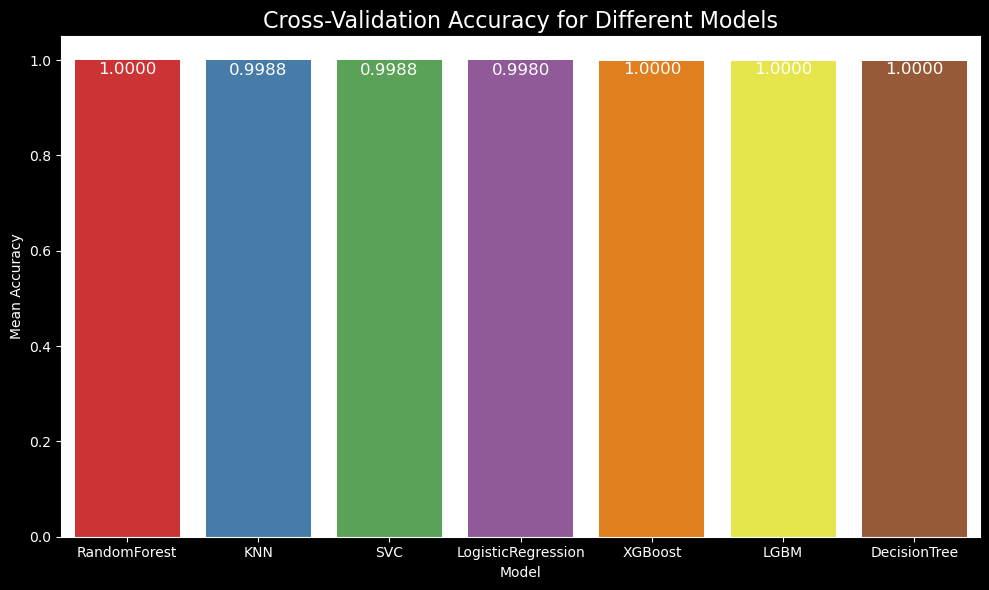

In [77]:
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_results_df, x='Model', y='Mean Accuracy', palette="Set1")
plt.title('Cross-Validation Accuracy for Different Models', fontsize=16, color='white')
plt.xlabel('Model', color='white')
plt.ylabel('Mean Accuracy', color='white')
for index, row in cv_results_df.iterrows():
    plt.text(index, row['Mean Accuracy'] - 0.02, f'{row["Mean Accuracy"]:.4f}', 
             color='white', ha="center", va="center", fontsize=12)
plt.tight_layout()
plt.show()


In [78]:
########## Best Model Training
model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [79]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred,average='micro')  
train_recall = recall_score(y_train, y_train_pred,average='micro')  
train_f1 = f1_score(y_train, y_train_pred,average='micro')  
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred,average='micro') 
test_recall = recall_score(y_test, y_test_pred,average='micro')  
test_f1 = f1_score(y_test, y_test_pred,average='micro') 
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 1.00
Test Precision: 1.00
Test Recall: 1.00
Test F1-Score: 1.00


In [80]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=names)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                                           precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        43
                                   GERD       1.00      1.00      1.00        28
                    Chronic cholestasis       1.00      1.00      1.00        46
                          Drug Reaction       1.00      1.00      1.00        42
                    Peptic ulcer diseae       1.00      1.00      1.00        33
                                   AIDS       1.00      1.00      1.00        33
                              Diabetes        1.00      1.00      1.00        39
                        Gastroenteritis       1.00      1.00      1.00        32
                       Bronchial Asthma       1.00      1.00      1.00        49
                          Hypertension        1.00      1.00      1.00        37

In [ ]:
# Save the model
pickle.dump(model,open('svc.pkl','wb'))

In [ ]:
with open('svc.pkl', 'rb') as file:
    svc = pickle.load(file)

NameError: name 'path' is not defined

###Logic for Recommendations

In [82]:
symptoms_dict = {}
diseases_list = {}
for name in names:
    diseases_list[label.transform([name])[0]] = name
with open('diseases_list.pkl', 'wb') as f:
    pickle.dump(diseases_list, f)
for i,name in enumerate(keys):
    symptoms_dict[name] = i
with open('symptoms_dict.pkl', 'wb') as f:
    pickle.dump(symptoms_dict, f)
print('*******************symptoms_dict*****************\n\n',symptoms_dict)
print('\n\n*******************diseases_list*****************\n\n',diseases_list)

*******************symptoms_dict*****************

 {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 's